# The Japanese American Internment and its Legacy


---

This notebook will explore data from the camps and provide context and techniques to analize the forced relocation of Japanese Americans during the 1940s.

*Estimated Time: 90 minutes*

---

### Table of Contents
1. [Section 1: The Data Science Lifecycle](#dslifecycle)
2. [Section 2: The Data](#data)
3. [Section 3: Data Exploration and Visualization](#Section-2:-Data-Exploration-and-Visualization)
4. [Section 4: Assembly Centers and Internment Centers](#Section-3:-Assembly-Centers-and-Internment-Centers)
5. [Section 5: Mapping and Movement](#Section-4:-Mapping-and-Movement)

---

## Context

In this course, you've been studying the consequences of Japanese American internment. Through this data and subsequent analysis, you'll be able to visualize the forced movement of Japanese Americans, from the west coast, to scattered internment camps, and eventually to cities throughout the country.

In [1]:
# Run this cell!
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

population1940_1945 = pd.read_csv("data/JapaneseAmericanPopulation_1940_1945_LL.csv", error_bad_lines = False)
relocations_cities = pd.read_csv("data/RelocationDestinations_Cities_LL.csv", error_bad_lines = False)
assembly = pd.read_csv('data/BehindBarbedWire_StoryMap_AssemblyCentersMap_Data.csv', error_bad_lines = False)

---

## Section 1: The Data Science Lifecycle<a id='dslifecycle'></a>

In data science, we utilize large and diverse datasets to make conclusions and predictions about the world we live in. Doing so involves a process called the **data science lifecycle**, which is a high-level description of the data science workflow. It is divided into four steps:
1. Formulating a question or problem
2. Acquiring and cleaning data
3. Conducting exploratory data analysis
4. Using prediction and inference to draw conclusions

<img src="images/dslifecycle.png" width="450">
Source: Data 100, Lecture 01
<br><br>
This process is often iterated as new questions and problems emerge after the last step to learn more characteristics and patterns of our world. In this notebook, we'll focus on step 3. We perform Exploratory Data Analysis (EDA) in order to understand patterns and trends occurring in the data, i.e. to understand the data. Note in the image that there are two distinct entry points, at "ask a question" and "obtain data." We'll enter the lifecycle in the second entry point.

----

## Section 2: The Data <a id='data'></a>

We will be working with a dataset that was manually digitized from tables in *The Evacuated People: A Quantitative Description*, a report published by the War Relocation Authority (WRA) in 1946. The WRA was the government agency that oversaw the forced relocation of Japanese Americans and was first established via Executive Order 9102 on March 18, 1942.  *The Evacuated People* contains statistics and more than 100 tables concerning the 120,313 Japanese Americans that were under the authority of the WRA. 

The tables in this report required manual transcription because the results from automatic scraping contained too many errors. Thus, there may still be some human error. The datasets included contain the populations of each camp by month, the relocation destinations of those who were incarcerated, and the Japanese American population in America before and throughout the war. Take a look at the full dataset <a href = https://data.world/infinitecoop/japanese-internment-camps/> here</a>.

The second dataset we're working with is from the story map "Behind Barbed Wire," created by the Library of Congress. The data comes from newspapers that were produced by Japanese-American internees while they lived in the camps. You can access the data and read about the newspapers <a href = https://tinyurl.com/y4g5kq77> here</a>.

<img src="images/Posted_Japanese_American_Exclusion_Order.png" width="450">
This image is available from the United States Library of Congress's Prints and Photographs division.
<br><br>
Below, we are loading in two datasets and doing a bit of data cleaning.

In [25]:
pop_by_month = pd.read_csv("data/CampPopulationsByMonth.csv", error_bad_lines = False, thousands = ',')
pop_by_month['Date']= pd.to_datetime(pop_by_month['Date']) 
camps = pd.read_csv('data/BehindBarbedWire_StoryMap_InternmentCampLocationsMap_Data.csv', error_bad_lines = False)
camps["Maximum Population"] = camps["Maximum Population"].str.replace(',', '')
camps['Maximum Population'] = camps['Maximum Population'].astype(float)

We'll first look at the `pop_by_month` table, which has the population of each of the ten camps at the start of every month.

In [26]:
pop_by_month.head()

,Date,Total,Topaz/Central Utah,Poston/Colorado River,Gila River,Granada,Heart Mountain,Jerome,Manzanar,Minidoka,Rohwer,Tule Lake
0,1942-06-01,17393,0,7281,0,0,0,0,9666,0,0,446
1,1942-07-01,27633,0,8755,0,0,0,0,9840,0,0,9038
2,1942-08-01,40316,0,13262,2106,0,0,0,9928,0,0,15020
3,1942-09-01,63031,0,17818,9150,212,5758,0,10072,4840,0,15181
4,1942-10-01,90499,5806,17847,11555,7480,10813,0,10256,9200,2265,15277


The `camps` table from Behind the Barbed Wire contains the internment camps, their locations -- city, name, latitude, and longitude -- the dates of when they opened and closed, and their maximum populations.

In [27]:
camps

,Internment Camp Name,Location,State,Latitude,Longitude,Opened,Closed,Maximum Population
0,Gila River Relocation Center,Rivers,Arizona,33.065083,-111.830528,20-Jul-42,16-Nov-45,13348.0
1,Poston Relocation Center,Parker,Arizona,33.987500,-114.401111,2-Jun-42,28-Nov-45,17814.0
2,Jerome Relocation Center,Denson,Arkansas,33.411667,-91.461111,6-Oct-42,30-Jun-44,8497.0
3,Rohwer Relocation Center,McGehee,Arkansas,33.766297,-91.280158,18-Sep-42,30-Nov-45,8475.0
4,Manzanar Relocation Center,Manzanar,California,36.728333,-118.154444,2-Jun-42,21-Nov-45,10046.0
5,Tule Lake Relocation Center,Newell,California,41.889444,-121.374722,27-May-42,20-Mar-46,18789.0
6,Granada Relocation Center,Amache,Colorado,38.049444,-102.328611,27-Aug-42,15-Oct-45,7318.0
7,Minidoka Relocation Center,Hunt,Idaho,42.679000,-114.244000,10-Aug-42,28-Oct-45,9397.0
8,Topaz Relocation Center,Topaz,Utah,39.418336,-112.708750,11-Sep-42,31-Oct-45,8130.0
9,Heart Mountain Relocation Center,Heart Mountain,Wyoming,44.671667,-108.946389,12-Aug-42,10-Nov-45,343.0


The `assembly` table by Behind the Barbed Wire has the locations of each assembly center (city, state, latitude, and longitude), as well as the number of people that were processed through each one.

In [28]:
assembly = assembly.dropna(subset=['Latitude', 'Longitude']).dropna(axis = 1)
assembly['Number of People'] = assembly['Number of People'].astype(float)
assembly

,Location,State,Number of People,Latitude,Longitude
0,Sacramento (Walerga),California,4598.0,38.566700,-121.483300
2,Manzanar (Up to 6/1/42),California,9564.0,36.728333,-118.154444
3,Fresno,California,5069.0,36.733300,-119.766700
4,Marysville (Arboga),California,2406.0,39.050000,-121.550050
5,Mayer,Arizona,249.0,34.383300,-112.233300
6,Merced,California,4081.0,37.300000,-120.466700
7,Pinedale,California,4664.0,36.840000,-119.800000
8,Pomona,California,5272.0,34.050000,-117.750000
9,Portland (Pacific Int. Exposition Ground),Oregon,3667.0,45.516700,-122.666700
10,Puyallup,Washington,7348.0,47.183300,-122.283300


The `population1940_1945` table has a list of counties that Japanese Americans lived in in 1940 and 1945. A separate column calculates the percent that returned to the county that they were from.

In [29]:
population1940_1945.head()

,County,State,1940,1945,% returned,Latitude,Longitude
0,Alameda,CA,5167,2703,52.3,37.779872,-122.282185
1,Amador,CA,2,0,0.0,37.667910,-121.873914
2,Butte,CA,216,107,49.5,46.003823,-112.534777
3,Calaveras,CA,6,0,0.0,36.159706,-95.958341
4,Colusa,CA,155,48,31.0,39.214334,-122.009417


----
# Section 3: Data Exploration and Visualization
In this second, we will also be performing a step in the data science life cycle, understanding the data. Specifically, we will be performing exploratory data analysis through data visualizations.

Sometimes numbers don't always add up. We have two separate tables with data about the internment camps, collected by two separate organizations. Say we try to compare the maximum population of the Manzanar camps from both tables.

In [30]:
pop_by_month_max = pop_by_month['Manzanar'].max()
camps_max = int(camps[camps['Internment Camp Name'] == 'Manzanar Relocation Center']['Maximum Population'])
print('Camps Data:',  camps_max)
print('Population by Month Data:' ,  pop_by_month_max)
#Are the two numbers equal?

Camps Data: 10046
Population by Month Data: 10256


The two numbers don't match up. The `pop_by_month` table says that the maximum population of Manzanar was 10,256, while the camps table says that the maximum was 10,046 people. While this isn't a huge difference, it's important to remember that there can be error in your datasets, and not to take any one dataset as complete and total fact. 

Below we use an interactive dropdown widget to help us compare the populations given by the two different data sets `pop_by_month` and `camps`. This widget compares the barplots for the maximum population in `pop_by_month` and `camps`. We can use the dropdown menu to view the different internment camps included in these two datasets.

In [31]:
location_dict = {'Topaz Relocation Center':'Topaz/Central Utah', 
                 'Poston Relocation Center':'Poston/Colorado River',
                 'Gila River Relocation Center':'Gila River', 
                 'Granada Relocation Center': 'Granada', 
                 'Heart Mountain Relocation Center':'Heart Mountain', 
                 'Jerome Relocation Center':'Jerome', 
                 'Manzanar Relocation Center':'Manzanar',
                 'Minidoka Relocation Center':'Minidoka', 
                 'Rohwer Relocation Center':'Rohwer', 
                 'Tule Lake Relocation Center':'Tule Lake'} 
def pop_diff(location):
    plt.subplots(dpi=250)
    sns.set(font_scale=.8)
    pbm_max = pop_by_month[location_dict[location]].max()
    camps_max = camps[camps['Internment Camp Name'] == location]['Maximum Population']
    bar = sns.barplot(x =['camps df', 'pop_by_month df'], y=[camps_max, pbm_max]);
    
Location = interact(pop_diff, location=camps['Internment Camp Name'].values);

interactive(children=(Dropdown(description='location', options=('Gila River Relocation Center', 'Poston Reloca…

### Discussion Question

<font color = #d14d0f>**QUESTION 1**:</font> Consider the visualization above. Identify its primary flaw (if any) and give a recommendation on how to improve this barplot.

**Answer:** YOUR ANSWER HERE

<br>
Now we can look at the data and start to see beyond the numbers. **This over-laid line plot compares the change in populations of the camps by month.** 

In [32]:
pop_by_month2 = pop_by_month.drop("Total", axis = 1)
melted = pd.melt(pop_by_month2, id_vars = ["Date"], value_vars = pop_by_month2.columns[1:], var_name = 'Camp', value_name = "Population")
fig = px.line(melted, x = 'Date', y = 'Population', color = 'Camp', title = 'Camp Populations by Month')
fig.show();

The histogram above displays a general downwards trend that indicates a steady decrease in camp population over time. 
Aside from a handful of camps whose population increased between July of 1943 and July of 1944, all the camps follow this general trend. **Reseach reason behind the spike in population between 1943 & 1944?**


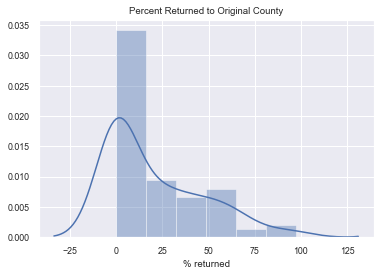

In [33]:
sns.distplot(population1940_1945['% returned'])
plt.title("Percent Returned to Original County");

This histogram shows that a vast majority of the individuals that were held in internment camps did not return to the location where they originally lived. The bin that indicated that 0% return to original location hold the most weight.

### Discussion Question


<font color = #d14d0f>**QUESTION 2**:</font> Visualizations allow us to picture how the numbers change and find abnormalities in the data set. What are some abnormalities that you see in the first plot? What are some possible explanations for these abnormalities?


**Answer:** YOUR ANSWER HERE

---

## Section 4: Assembly Centers and Internment Centers<a id='#Section-4:-Assembly-Centers-and-Internment-Centers'></a>

Executive Order 9066 was signed and issued by President Franklin Roosevelt on February 19, 1942. This order gave the army authorization to evacuate any individual considered a threat to national security from designated military exclusion zones along the west coast to internment camps further inland. The passing of this executive order began the process of funneling Japanese Americans into intermediate assembly centers and finally permanent internment centers. 

The maps below show how far people were forced to move from one location to another. Mapping data is a useful tool to visualize locations and provide context when we are given longitude and latitude data.

<img src="images/Luggage_Japanese_American_internment.png" width="400">

The luggage of the Japanese Americans who have arrived at a reception center.
This image is available from the United States Library of Congress's Prints and Photographs division.

### Assembly Centers

Japanese Americans were uprooted from their homes and transported from assembly centers to internment camps all across the country. Assembly centers served as temporary internment centers for internees to stop at before being transported to their permanent internment center. The map below displays the geological location of the assembly centers created after the passing of the Executive Order 9066.


To zoom in and out on the map, press the + and - buttons or scroll up and down. Also, click on the blue marker to see the assembly center name. 

In [34]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(assembly)):
    folium.Marker(
      location=(assembly.iloc[i]['Latitude'], assembly.iloc[i]['Longitude']),
      popup=assembly.iloc[i]['Location'],
      ).add_to(m)
m

### Internment Camps


The map below shows the location of internment centers across the country. Notice that the internment centers are located further inland that assembly centers. This is because a majority of the Japanese Americans that were held in internment camps were originally from the west coast. After the order passed, these Japanese Americans were relocated to nearby assembly centers as authorities prepared to relocate them to further internment centers. 

In [35]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(camps)):
    folium.Marker(
      location=(camps.iloc[i]['Latitude'], camps.iloc[i]['Longitude']),
      popup=camps.iloc[i]['Internment Camp Name'],
      ).add_to(m)
m

---
<br>

## Section 5: Mapping and Movement<a id='section 5'></a>

The abrupt relocation of countless Japanese Americans during World War II resulted in a lasting change in the location of many of these Japanese American families even after the war ended. During the relocation process many families were forced to quickly sell their possessions, businesses and land holdings. Those who did not, often came back to find their possessions gone and homes vandalized. As a result, many internees that lived on the West Coast of the United States did not return to their previous homes after the war. 

<img src="images/Hayward_Friends_say_goodbye.png" width="400">
Neighbors in Hayward, California saying goodbye.
This image is available from the United States Library of Congress's Prints and Photographs division.


### Location of Evacuees Before Relocation

The map below shows the population of each county at the start of World War II in 1940, just before the Executive Order 9066 in 1942. Japanese Americans were largely concentrated on the West Coast, with the largest population in Los Angeles.

In [36]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(population1940_1945)):
    folium.Circle(
      location = (population1940_1945.iloc[i]['Latitude'], population1940_1945.iloc[i]['Longitude']),
      popup = population1940_1945.iloc[i]['County'],
      radius = float(population1940_1945.iloc[i]['1940']) *12,
      color = 'blue',
      fill = True,
      fill_color = 'crimson').add_to(m)
m

In [37]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'

def color(pop): 
    if pop in range(0,1000): 
        col = 'green'
    elif pop in range(1001,4999): 
        col = 'blue'
    elif pop in range(5000,10000): 
        col = 'orange'
    else: 
        col='red'
    return col 

population1940_1945['marker_color'] = [color(pop) for pop in population1940_1945['1940'].tolist()]

for i in range(0,len(population1940_1945)):
    folium.CircleMarker(
        location = (population1940_1945.iloc[i]['Latitude'], population1940_1945.iloc[i]['Longitude']),
        radius = 1,
        popup = population1940_1945.iloc[i]['County'],
        color = population1940_1945.iloc[i]['marker_color'],
    ).add_to(m)
m



### Discussion Question

<font color = #d14d0f>**QUESTION 3**:</font> The two visualizations above map the same data. What are the differences between the two maps? What are the advantages and disadvantages of each?

**Answer:** YOUR ANSWER HERE 

*Potential Answer: The first map indicates population by size of the circle where as the second map indicates by color. A disadvantage of the first map is that the circles begin to overlap and cloud the overall view of the map. An advantage of the first map is that it is very easy to tell where large populations lie on the map. A disadvantage of the second map is that one must consult the legend to understand what the map is displaying. An advantage of the second map is that each marker is clearly visible and they do not overlap.*



### Location of Evacuees After the War

This table shows the number of Japanese Americans in each county after the war. This data was self-reported by evacuees.

In [38]:
reloc_cities = pd.read_csv('data/RelocationDestinations_Cities_LL.csv', error_bad_lines = False)
reloc_cities['People'] = reloc_cities['People'].astype(float)
reloc_cities.head()

,City,State,People,Latitude,Longitude
0,Glendale,AZ,487.0,34.142508,-118.255075
1,Alameda,CA,211.0,37.779872,-122.282185
2,Berkely,CA,844.0,37.871523,-122.273042
3,Burbank,CA,228.0,34.180839,-118.308966
4,Dinuba,CA,201.0,36.543284,-119.387066


This map shows the cities that people relocated after the war. It allows us to visualize the extent people had to relocate from their original homes which were mostly on the west coast of the U.S. We can see a large population moved to the midwest (Chicago area) as well as the east coast, Canada, and even Mexico City. 

In [39]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(reloc_cities)):
    folium.Circle(
      location=(reloc_cities.iloc[i]['Latitude'], reloc_cities.iloc[i]['Longitude']),
      popup=reloc_cities.iloc[i]['City'],
      radius=reloc_cities.iloc[i]['People'] * 12,
      color='blue',
      fill=True,
      fill_color='red').add_to(m)
m

### Discussion Question

<font color = #d14d0f>**QUESTION 4**:</font> As was mentioned above, this data is self reported by evacuees. What effect does the fact that the data is self-reported have on the data collected and the conclusions made? 

**Answer:** YOUR ANSWER HERE

*Potential Answer: The fact that the data is self reported indicates that the data might have an underlying bias due to the people who chose to report and those who did not. The data might not be representative of all the evacuees.*



### State Population Size Before & After the War


Below is the table comparing the pre- and post-internment population sizes for West Coast states. The table has been separated into the three states for easier readability. Look through the population size values and look for interesting trends.

In [40]:
population1940_1945[population1940_1945['State'] == 'CA']

,County,State,1940,1945,% returned,Latitude,Longitude,marker_color
0,Alameda,CA,5167,2703,52.3,37.779872,-122.282185,orange
1,Amador,CA,2,0,0.0,37.667910,-121.873914,green
2,Butte,CA,216,107,49.5,46.003823,-112.534777,green
3,Calaveras,CA,6,0,0.0,36.159706,-95.958341,green
4,Colusa,CA,155,48,31.0,39.214334,-122.009417,green
5,Contra Costa,CA,829,622,75.0,37.853409,-121.901795,green
6,El Dorado,CA,3,13,0.0,37.816756,-96.886996,green
7,Fresno,CA,4527,4296,94.9,36.737798,-119.787125,blue
8,Glenn,CA,0,65,0.0,33.757020,-84.393041,green
9,Humboldt,CA,0,2,0.0,40.745005,-123.869509,green


In [41]:
population1940_1945[population1940_1945['State'] == 'OR']

,County,State,1940,1945,% returned,Latitude,Longitude,marker_color
51,Clackamas,OR,163,56,34.4,45.407621,-122.570369,green
52,Clatsop,OR,98,2,0.0,46.021080,-123.765304,green
53,Columbia,OR,38,0,0.0,35.461166,-97.650246,green
54,Deschutes,OR,14,0,0.0,37.270590,-79.939353,green
55,Hood River,OR,462,186,40.3,45.706798,-121.528087,green
56,Jackson,OR,41,8,0.0,32.298757,-90.184810,green
57,Jefferson,OR,12,12,0.0,37.109584,-95.762571,green
58,Josephine,OR,0,17,0.0,36.126766,-86.789056,green
59,Klamath,OR,1,126,0.0,41.526509,-124.038407,green
60,Lane,OR,1,1,0.0,37.224866,-95.706484,green


In [42]:
population1940_1945[population1940_1945['State'] == 'WA']

,County,State,1940,1945,% returned,Latitude,Longitude,marker_color
70,Benton,WA,69,0,0.0,34.564537,-92.586828,green
71,Chelan,WA,26,12,0.0,47.840832,-120.016808,green
72,Clallam,WA,17,0,0.0,48.040512,-124.016766,green
73,Clark,WA,110,22,20.0,37.223312,-95.702194,green
74,Grays Harbor,WA,2,6,0.0,46.995353,-123.701247,green
75,Jefferson,WA,37,14,0.0,37.109584,-95.762571,green
76,King,WA,9863,3411,34.6,37.037307,-95.616366,orange
77,Kitsap,WA,345,75,21.7,47.647661,-122.641258,green
78,Kittitas,WA,9,0,0.0,46.983182,-120.417010,green
79,Klickitat,WA,121,37,30.6,45.817067,-121.152572,green


### Discussion Question


<font color = #d14d0f>**QUESTION 5**:</font> Based on the tables and maps above, identify an interesting aspect of the data that could be pursued further.


**Answer:** YOUR ANSWER HERE

---

**Make sure that you've answered all the questions. There are five in total.**

You are finished with this notebook! Please run the following cell to generate a download link for your submission file to submit on bCourses. ***It is very likely that this download link will not work. If the download link does not work, please use the alternate download method described below.***

Alternate download instructions:
- open a new tab and go to https://datahub.berkeley.edu
- go to the `colwrit-r4b` folder
- click the box next to `Japanese-Internment-notebook.pdf`
- click the "Download" link below the menu bar

**Check the PDF before submitting and make sure all of your answers are shown.**

In [43]:
#!pip install gsexport -q
#import gsExport
#gsExport.generateSubmission("Japanese-Internment-notebook.ipynb")

#from otter.export import export_notebook
#from IPython.display import display, HTML # new

#export_notebook("style.ipynb", filtering=True, pagebreaks=True)
#display(HTML("Save this notebook, then click <a href='style.pdf' download>here</a> to open the pdf.")) # new

---
Notebook developed by: Alleanna Clark, Aishah Mahmud, Monica Wilkinson

Data Science Modules: http://data.berkeley.edu/education/modules
